In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [6]:
df = pd.read_pickle('/Users/robin/ThesisRevisions/period_of_interest.pd')

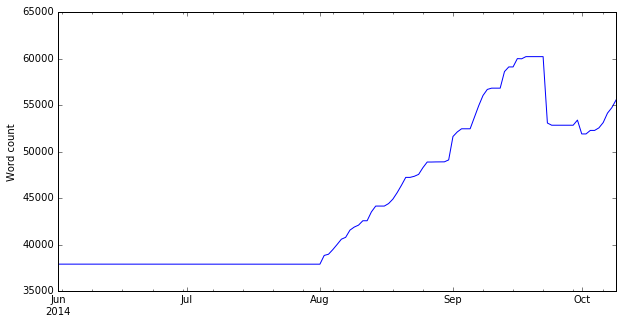

In [7]:
df.Total.plot(figsize=(10, 5))
plt.ylabel('Word count')

## Overall stuff

In [8]:
total_increase = df.Total.max() - df.Total.min()
print(total_increase)

22317.0


In [9]:
total_increase / 48

464.9375

In [10]:
df.Total.argmax() - df.Total.argmin()

Timedelta('48 days 00:00:00')

In [11]:
df.Total.argmax()

Timestamp('2014-09-18 00:00:00', offset='D')

## Daily stuff

In [12]:
df.diff().max()

Applications          1234
A_NoiseEffects         104
A_Py6S                 106
Conclusions           1272
HOTAOTRelationship     955
ImprovingHOT          1040
Intro                  792
LitReview              437
Scoping                108
ValidatingHOT          558
Validation             639
Total                 2516
dtype: float64

In [13]:
df.diff().Total.argmax()

Timestamp('2014-09-01 00:00:00', offset='D')

In [14]:
d = df.Total.diff()

In [15]:
d_sub = d['2014-08-01 00:00:00':]

In [16]:
len(d_sub[d_sub == 0]) # How many days with no work!

22

In [17]:
total_increase / (48 - 22)

858.34615384615381

In [18]:
darr = d_sub.as_matrix()

# 1st Aug 2014 is a Friday
darr = np.concatenate([[0,0,0,0], darr, [0, 0, 0]])
darr = darr.reshape((11, 7))
darr[darr == 0] = np.nan
darr = np.flipud(darr)

In [19]:
d_sub.abs()[d_sub.abs() != 0].min()

5.0

In [20]:
a = np.arange

In [21]:
a = np.arange

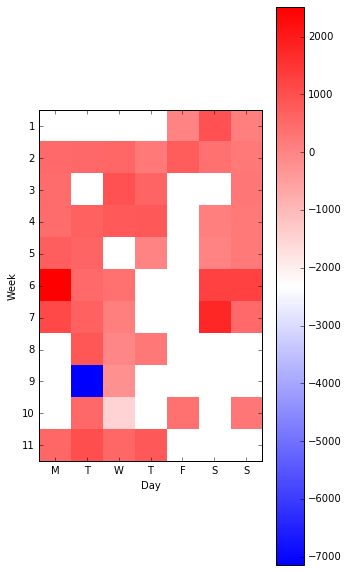

In [22]:
plt.figure(figsize=(5, 10))
plt.imshow(darr, interpolation='nearest', origin='higher', cmap=plt.cm.get_cmap('bwr'))
plt.colorbar()
plt.xticks(np.arange(7), ['M', 'T', 'W', 'T', 'F', 'S', 'S'])
plt.yticks(np.arange(11), np.arange(11, 0, -1))
plt.xlabel('Day')
plt.ylabel('Week')

In [25]:
darr[np.isnan(darr)] = np.nan
darr[darr < 0] = np.nan

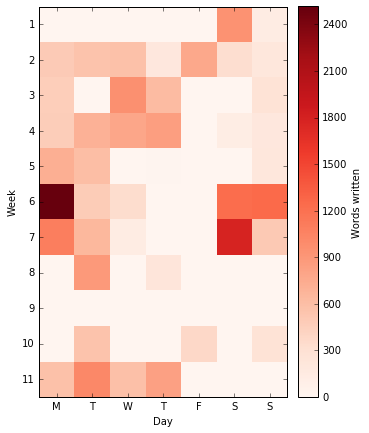

In [32]:
plt.figure(figsize=(5, 10))
plt.imshow(darr, interpolation='nearest', origin='higher', cmap=plt.cm.Reds)
plt.colorbar(fraction=0.07, pad=0.04, label='Words written')
plt.xticks(np.arange(7), ['M', 'T', 'W', 'T', 'F', 'S', 'S'])
plt.yticks(np.arange(11), np.arange(11, 0, -1))
plt.xlabel('Day')
plt.ylabel('Week')

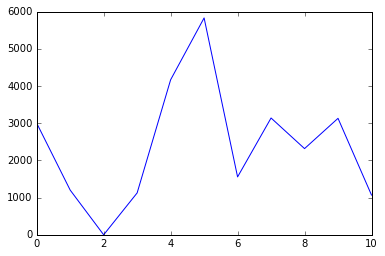

In [33]:
written_per_week = darr.sum(axis=1)
plt.plot(written_per_week)

In [34]:
written_per_dow = darr.sum(axis=0)

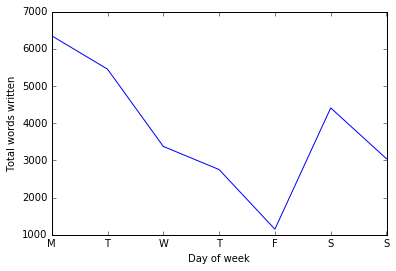

In [35]:
plt.plot(written_per_dow)
plt.xticks(np.arange(7), ['M', 'T', 'W', 'T', 'F', 'S', 'S'])
plt.xlabel('Day of week')
plt.ylabel('Total words written')

## Weekly stuff

In [36]:
df.resample('W').diff().max()

Applications          3584.142857
A_NoiseEffects          49.750000
A_Py6S                  15.142857
Conclusions           2198.857143
HOTAOTRelationship    2408.285714
ImprovingHOT          1696.333333
Intro                  508.285714
LitReview              725.250000
Scoping                  0.000000
ValidatingHOT           54.857143
Validation            1530.428571
Total                 4453.428571
dtype: float64

In [37]:
df.resample('W').diff().Total.argmax()

Timestamp('2014-09-14 00:00:00', offset='W-SUN')

## Individ hourly stuff

In [50]:
ihot = pd.read_pickle('/Users/robin/ThesisRevisions/HOTAOTRelationship.pd')

In [51]:
ihot = ihot.set_index('timestamp')

In [52]:
# written_by_hour_d = ihot.wordcount.diff()
# written_by_hour_d = written_by_hour_d[written_by_hour_d > 0]
# written_by_hour = written_by_hour_d.resample('H', how='sum')

In [65]:
ohlc = ihot.wordcount.resample('H', how='ohlc')
written_by_hour = ohlc['close'] - ohlc['open']

In [80]:
per_hour = written_by_hour.groupby(written_by_hour.index.hour).mean()

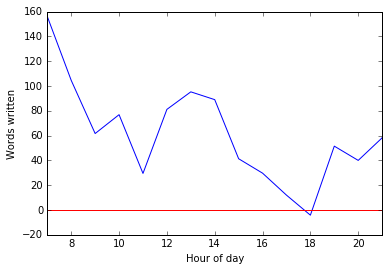

In [81]:
per_hour.plot()
plt.xlim(7, 21)
plt.xlabel('Hour of day')
plt.ylabel('Words written')
plt.axhline(0, color='red')

In [82]:
per_hour_day = written_by_hour.groupby([written_by_hour.index.dayofweek, written_by_hour.index.hour]).sum()
per_hour_day = per_hour_day.fillna(0)

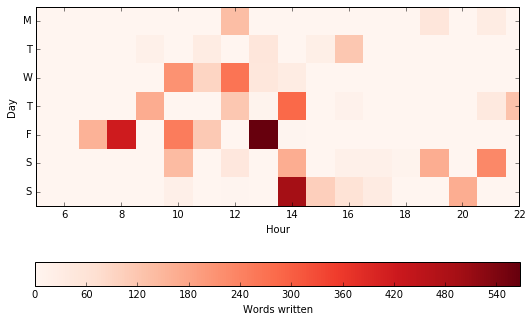

In [102]:
plt.figure(figsize=(10, 5))
plt.imshow(per_hour_day.unstack().as_matrix(), interpolation='nearest', origin='higher', cmap=plt.cm.get_cmap('Reds'), vmin=0)
plt.colorbar(fraction=0.087, pad=0.2, label='Words written', orientation='horizontal')
plt.yticks(np.arange(7), list(reversed(['M', 'T', 'W', 'T', 'F', 'S', 'S'])))
plt.xlim(5, 22)
plt.xlabel('Hour')
plt.ylabel('Day')